# **Credit Card Users Churn Prediction**

**Background & Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

There is a need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards. Thus it is important to identify the best possible model that will give the required performance

**Objective**

1.  Explore and visualize the dataset.
2.  Build a classification model to predict if the customer is going to churn or not
3.  Optimize the model using appropriate techniques
4.  Generate a set of insights and recommendations that will help the bank

**Data Dictionary:**

*   CLIENTNUM: Client number. Unique identifier for the customer holding the account
*   Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
*   Customer_Age: Age in Years
*   Gender: Gender of the account holder
*   Dependent_count: Number of dependents
*   Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
*   Marital_Status: Marital Status of the account holder
Income_Category: Annual Income Category of the account holder
*   Card_Category: Type of Card
*   Months_on_book: Period of relationship with the bank
*   Total_Relationship_Count: Total no. of products held by the customer
*   Months_Inactive_12_mon: No. of months inactive in the last 12 months
*   Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
*   Credit_Limit: Credit Limit on the Credit Card
*   Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
*   Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
*   Total_Trans_Amt: Total Transaction Amount (Last 12 months)
*   Total_Trans_Ct: Total Transaction Count (Last 12 months)
*   Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
*   Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
*   Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


#Loading Libraries

In [6]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    make_scorer,
    roc_curve,
)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

# To tune different models
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# to create pipeline and make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

In [7]:
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [8]:
# Imblearn libary is used to handle imbalanced data
!pip install imblearn --user

!pip install imbalanced-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import dataset

In [9]:
df_bank = pd.read_csv("/content/BankChurners.csv")

In [10]:
# copying data to another df to avoid any changes to original data
df_copy = df_bank.copy()

### View the first and last 5 rows of the dataset.

In [11]:
df_copy.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


### Understand the shape of the dataset.

In [12]:
df_copy.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns 

### Check the data types of the columns for the dataset.

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* Dependent variable is the salary which is of categorical type

* Education and Marital status columns have missing values in the dataset.

* There are 10 coulmns of interger datatype, five of float and seven of objects. 

In [14]:
# drop a clientnum
df_copy.drop("CLIENTNUM", axis=1, inplace=True)

In [15]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.000,0.760,0.219,0.000,0.631,0.736,0.859,3.397


* `age`: Average age of people in the dataset is 46 years, age has a wide range from 26 to 73 years.
* `credit limit`: The average credit limit is 4549, with the highest being 34,516 and lowest being 1438, which indicates that there might be outliers present in this variable.
* `Average open to buy`: There's a huge difference in the minimum and maximum, with an average of 3474, mimimum of 3, and maximum of 34,516
* `Total transaction_ct`: Has a huge difference between the 75th and the maximum value, indicating the presence of outliers.

**Checking the value count for each category of categorical variables** 

In [16]:
# filtering object type columns
cat_columns = df_copy.describe(include=["object"]).columns
cat_columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [17]:
# Making a list of all catrgorical variables
cat_columns = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# Printing number of count of each unique value in each column
for column in cat_columns:
    print(df_copy[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


- We have more female customers as compared to male customers
- The highest number of customers are Graduates by education level and minority being at Doctrate level. There are six leveld of education
- The married form majority of the customers and divorced being the least
- In regards to in-come category, the highest number of clients earn less than 40k, with the least earning 120K
- Customers with blue cards form majority of the clients, and the least being those with platinum

# **EDA**

## Univariate analysis

In [447]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [448]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Attrition Flag

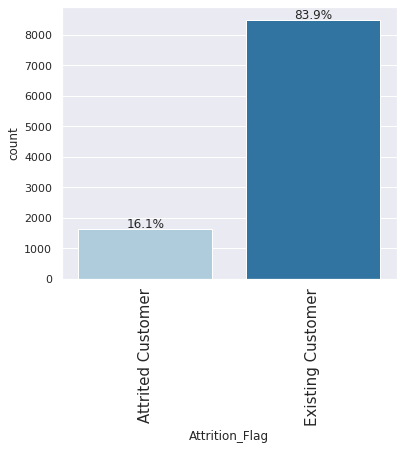

In [449]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Attrition_Flag", perc=True, n=5)

* 83% of the customers are existing customers

### Observations on Gender

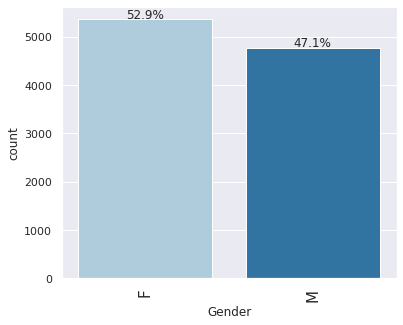

In [450]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Gender", perc=True, n=5)

- 52% of the customers are female and the rest are male

### Observations on Dependent

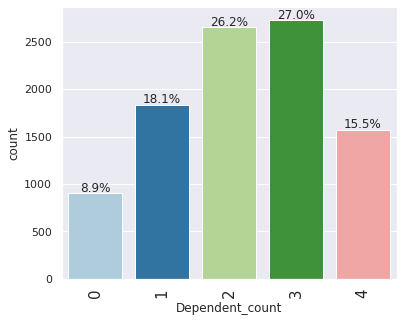

In [451]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Dependent_count", perc=True, n=5)

- Majority of the customers either have 2 or 3 dependants while the least of the clients have none. 

### Observations on Duration of Education_Level

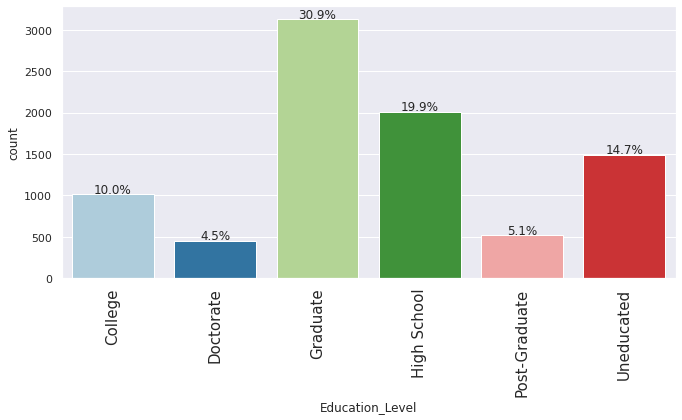

In [454]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Education_Level", perc=True, n=10)

- Majority of the customers, 30%, are graduates while the least are doctorate level with 4.5% and post-gradute who form 5% of the customers.

### Observations on Marital Status

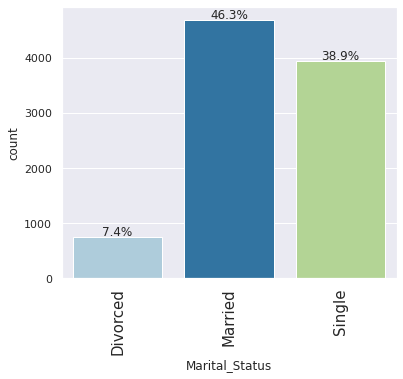

In [456]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Marital_Status", perc=True, n=5)

- Majority of the customers, 46%, are married, followed by the single, 39% and the least being tghe divorced who form 7% of the customer base.  customers.

### Observations on Income_Category           

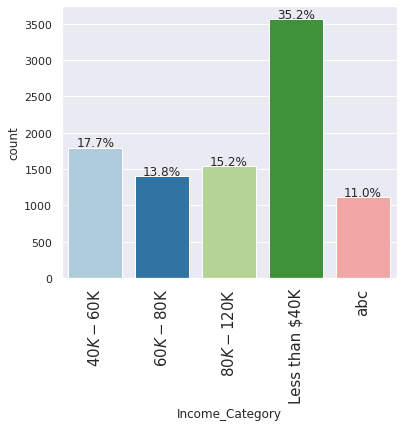

In [23]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Income_Category", perc=True, n=5)

- 35% of the customers earn less than 40k and these form majority of the clients with the least being unknown .

### Observations on Card_Category                 

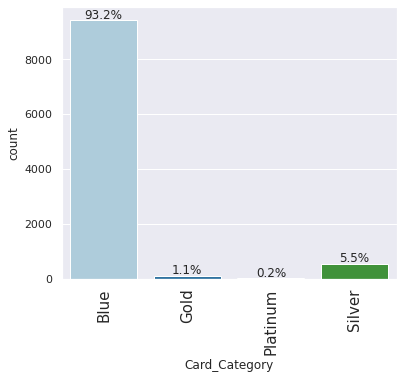

In [457]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Card_Category", perc=True, n=5)

- The highest proportion of the customers, 93%, have the blue cards followed by those with silver who are 5.5%, and the rest being less than 2% of the customers. 

### Observations on Total_Relationship_Count                   

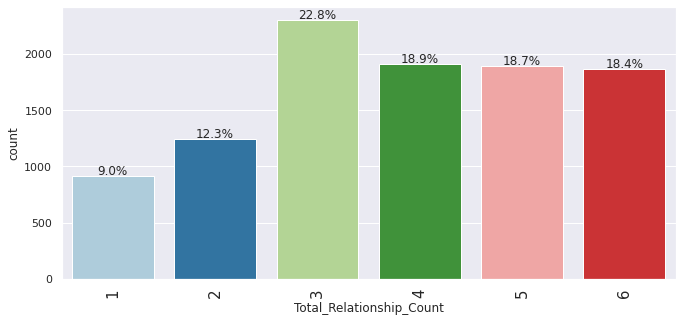

In [458]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Total_Relationship_Count", perc=True, n=10)

- The highest proportion of the clients, 23%, have 3 products, and about 18% having 4,5 and 6 products. 

### Observations on Months_Inactive_12_mon                       

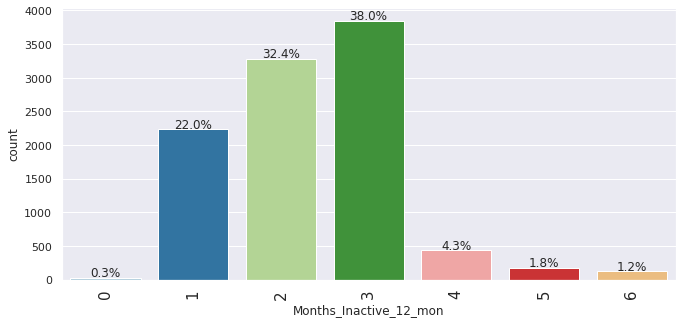

In [459]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Months_Inactive_12_mon", perc=True, n=10)

- Majorty of the clients have been inactive for 3 months, followed by those inactive for 2 months and 1 month.

### Observations on Contacts_Count_12_mon                       

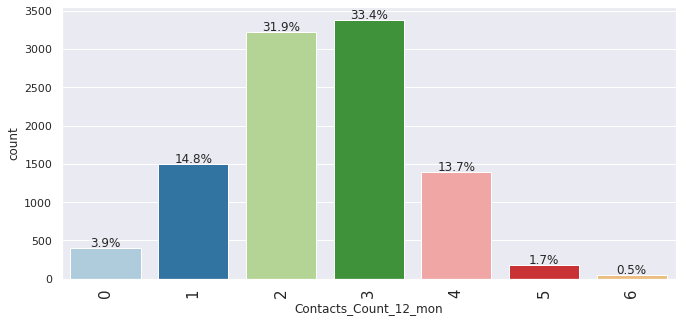

In [460]:
# limiting to only top 5 ocuurences
labeled_barplot(df_copy, "Contacts_Count_12_mon", perc=True, n=10)

- Majority, 33%, of the clients have had contact with the bank in the last three months, 32% in the last 2 months and the least, less than 2%, being those that have had contact in the last either 5 or 6 months. 

### Observations on Customer_Age              

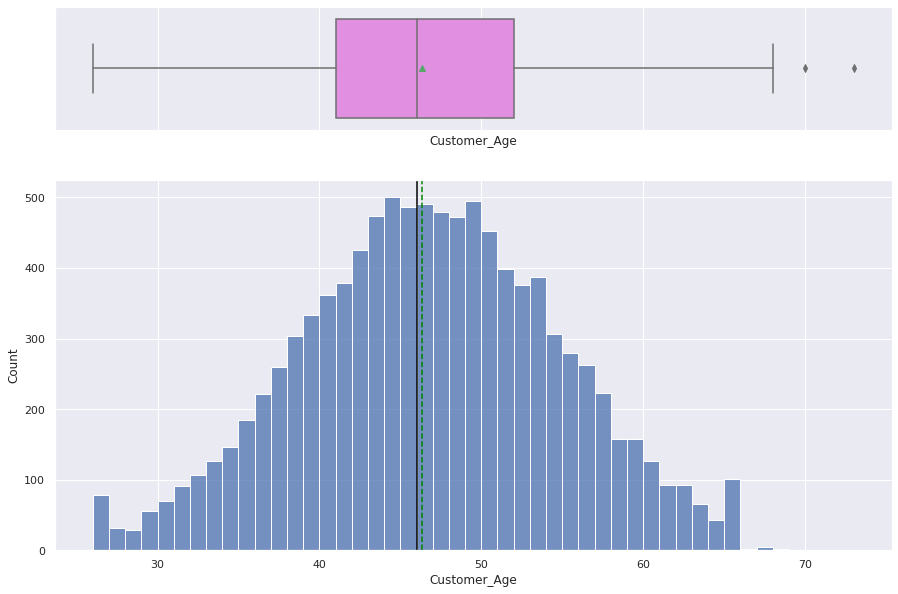

In [28]:
histogram_boxplot(df_copy, "Customer_Age")

* The distribution of Age is normally distributed with few outliers of those aged more than 67yrs thereabout. 

### Observations on Months_on_book            

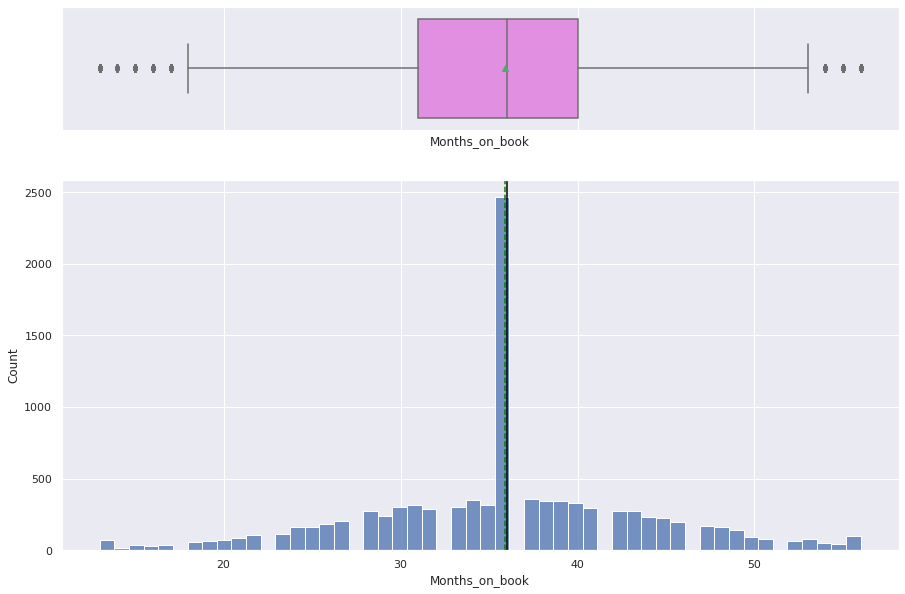

In [29]:
histogram_boxplot(df_copy, "Months_on_book")

* The distribution of Months on book is normally distributed with the highest being right in the middle. There are however some outliers in this variable. 
 outliers of those aged more than 67yrs thereabout.  

### Observations on Credit_Limit                  

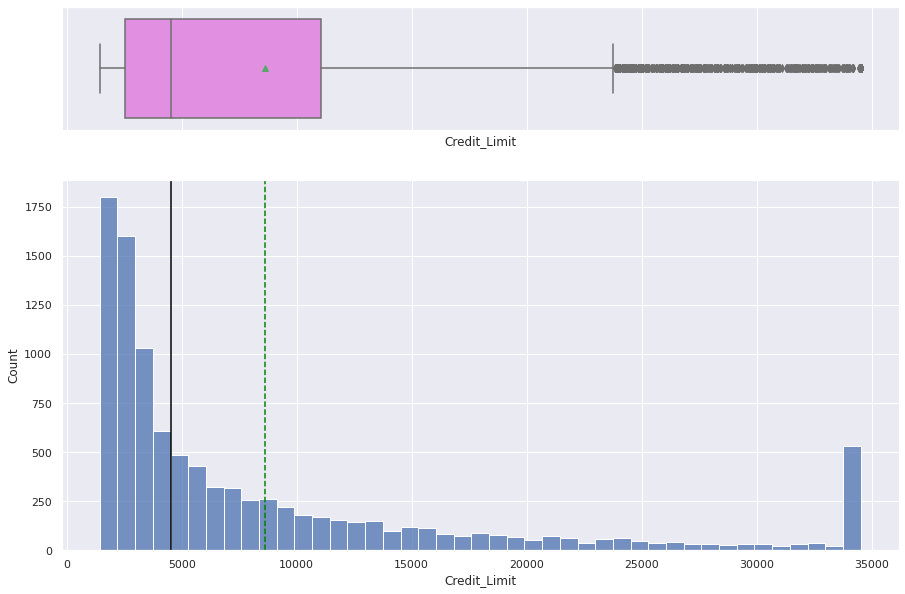

In [30]:
histogram_boxplot(df_copy, "Credit_Limit")

* The Credit limit is skewed to the right and there are outliers in this variable as shown in the boxplot. 

### Observations on Total_Revolving_Bal            

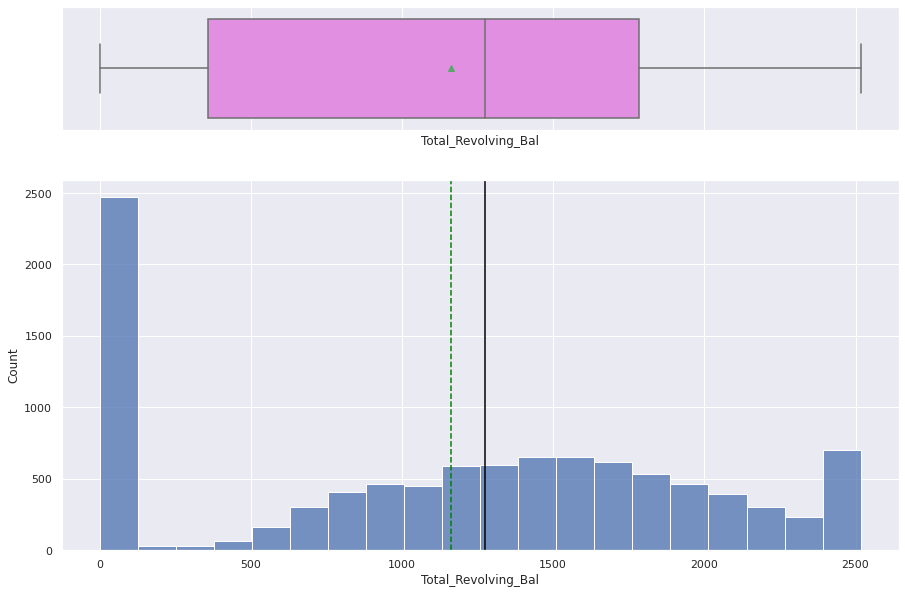

In [32]:
histogram_boxplot(df_copy, "Total_Revolving_Bal")

* The distribution of the revolving balance is almost normal though the majority of the clients are the extreem end of less than 200 

### Observations on Avg_Open_To_Buy            

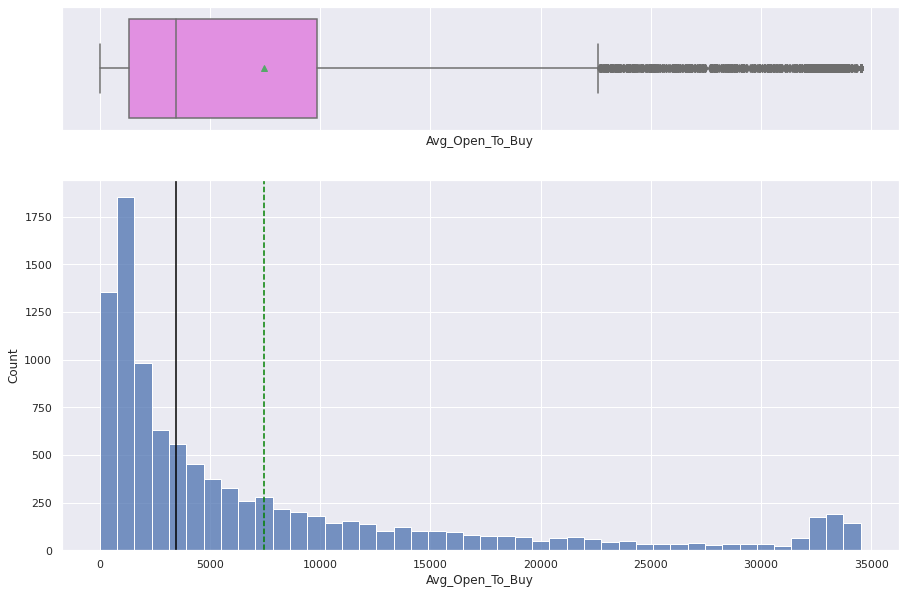

In [33]:
histogram_boxplot(df_copy, "Avg_Open_To_Buy")

* The distribution of Average open to buy is rightly skewed with outliers as shown in the boxplot

### Observations on Total_Amt_Chng_Q4_Q1            

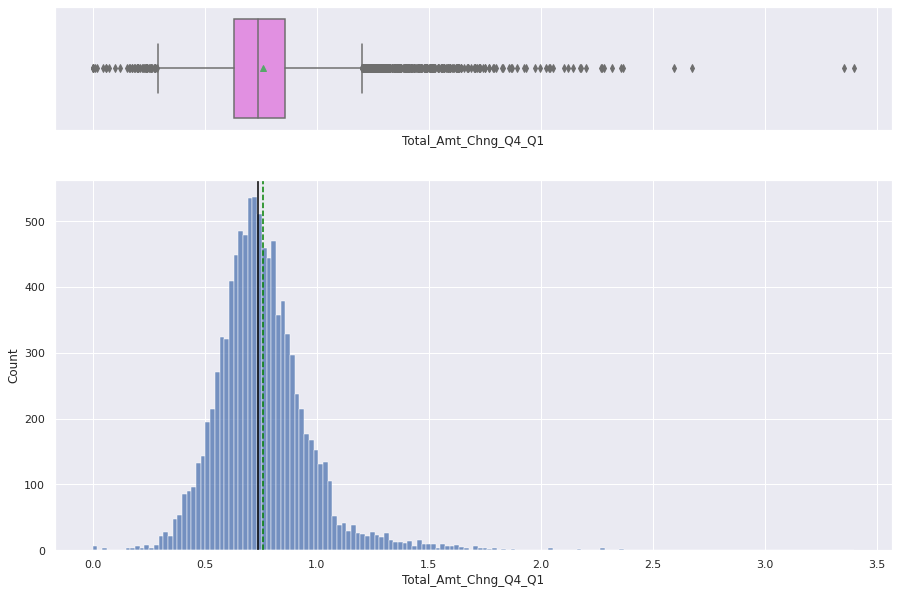

In [34]:
histogram_boxplot(df_copy, "Total_Amt_Chng_Q4_Q1")

* The distribution of the Ration of the Total Amount is normally distributed with many outliers to the 75th quartile 

### Observations on Total_Trans_Amt            

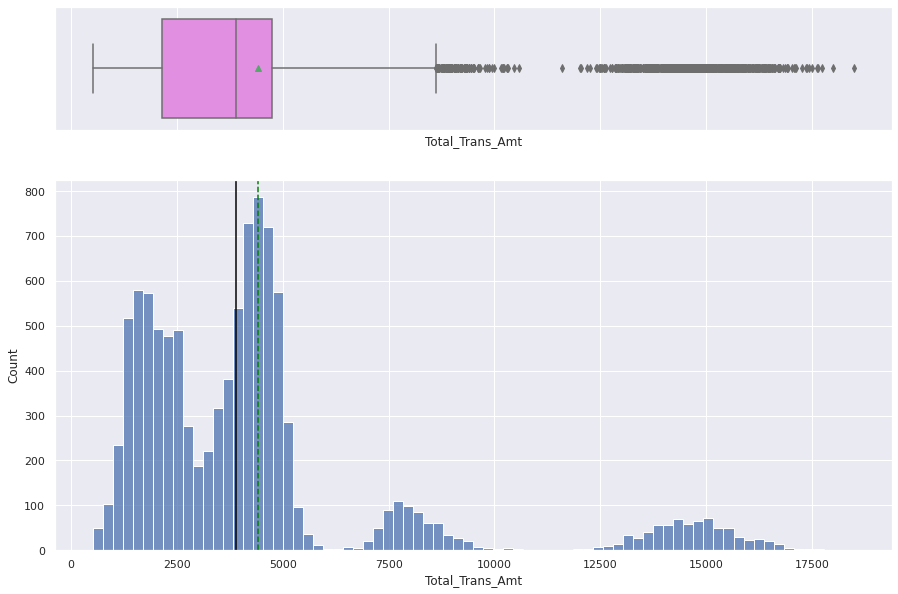

In [35]:
histogram_boxplot(df_copy, "Total_Trans_Amt")

* The distribution of Total transaction amount is skewed to the right, with outliers as shown in the box-plot  

### Observations on Total_Trans_Ct            

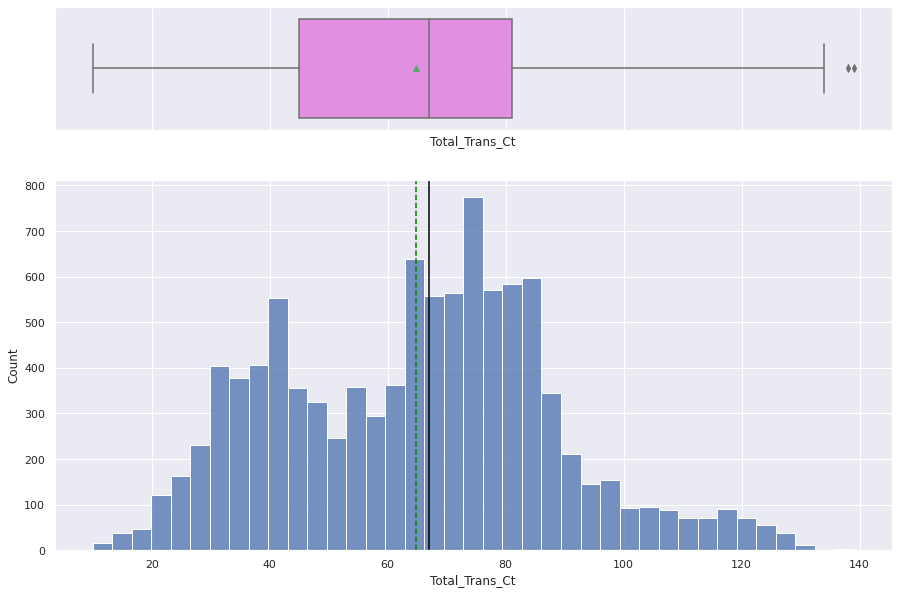

In [36]:
histogram_boxplot(df_copy, "Total_Trans_Ct")

* The distribution of Total transaction Ct is almost normally distributed, there are however some outliers in this variable. 

### Observations on Avg_Utilization_Ratio            

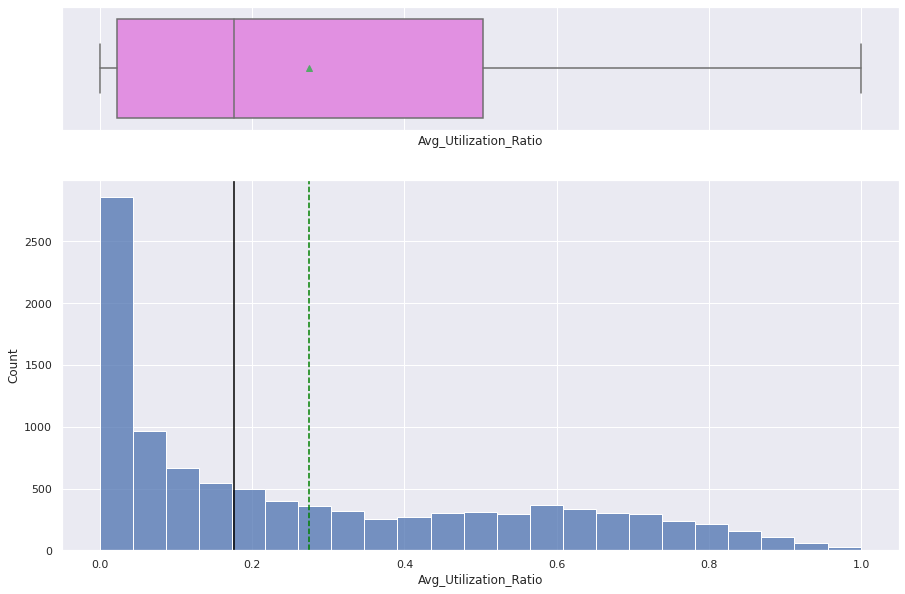

In [38]:
histogram_boxplot(df_copy, "Avg_Utilization_Ratio")

* The distribution of Average utilization ratio is skewed to the right, with o outliers 

##Bi-variate

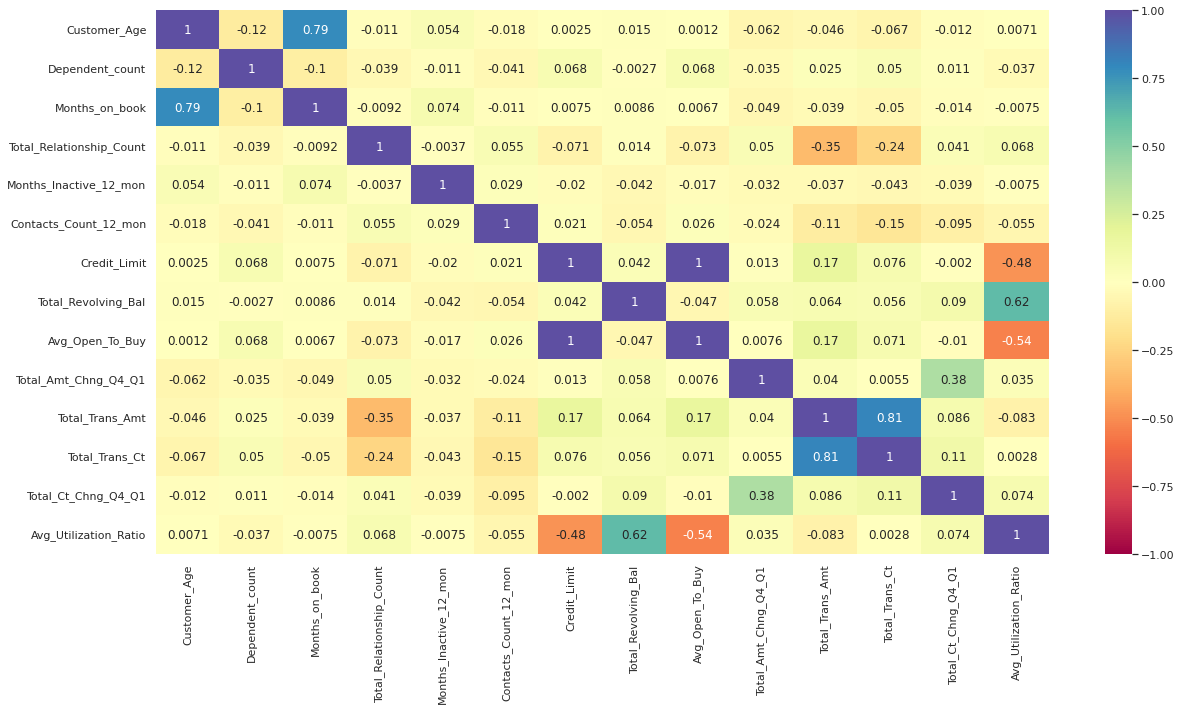

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations**
* Average open day and credit limit are highly positively correlated
* Total transaction amount vs Total transaction CT, Total revolving bal vs average utilization ratio, and Months on book vs customer age are highly and positively correlated 
*  Average open to buy and average utilization ratio are negatively correlated, same as credit limit vs average utilization ratio. 


**Analysis for the categorical variables**

In [22]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


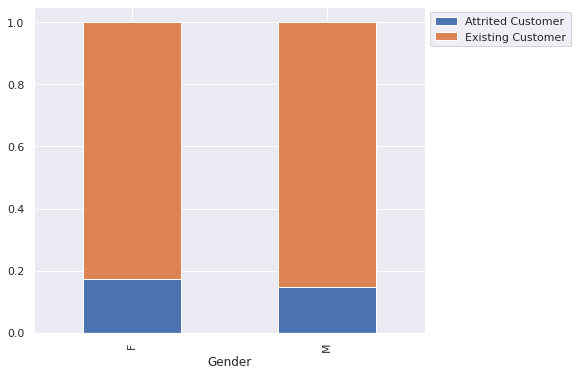

In [31]:
stacked_barplot(df_copy, "Gender", "Attrition_Flag")

- Majority of the female customers are attriting compared to the male

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


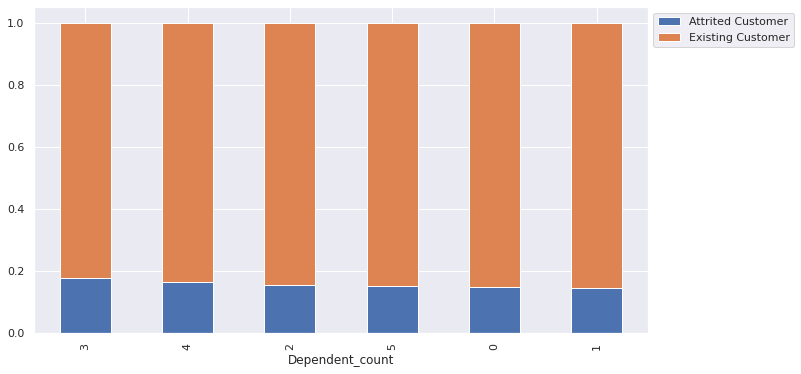

In [463]:
stacked_barplot(df_copy, "Dependent_count", "Attrition_Flag")

- There are no huge difference among the customers with the different dependants in regards to them being in existenace or those that have attrited. Notably though is that those with 3 and 4 dependants are among the highest of the customers that have attrited 

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


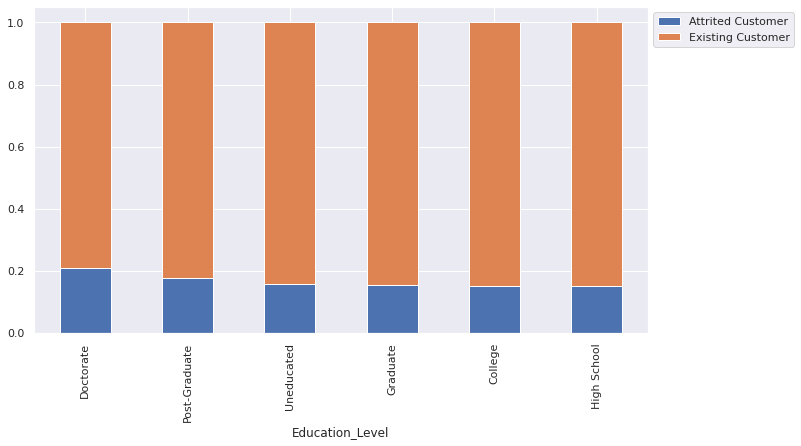

In [26]:
stacked_barplot(df_copy, "Education_Level", "Attrition_Flag")          

- Majoritty of the doctorate clients have attrited, and this could be because they are likely to be at a comfortable level where they do not need credit cards, followed by those on Post-Graduate

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


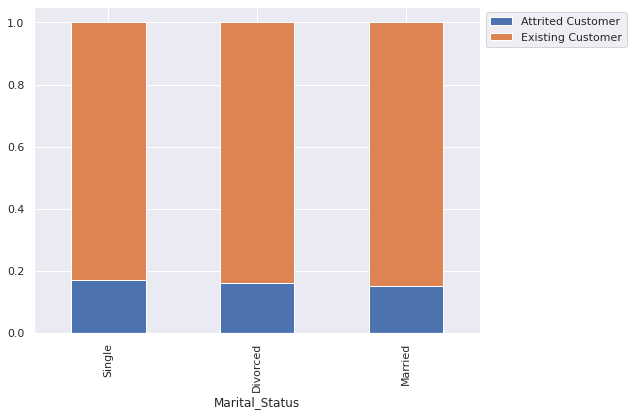

In [27]:
stacked_barplot(df_copy, "Marital_Status", "Attrition_Flag")          

- The single clients attrite more that the divorced, while the married are the least in attrition

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


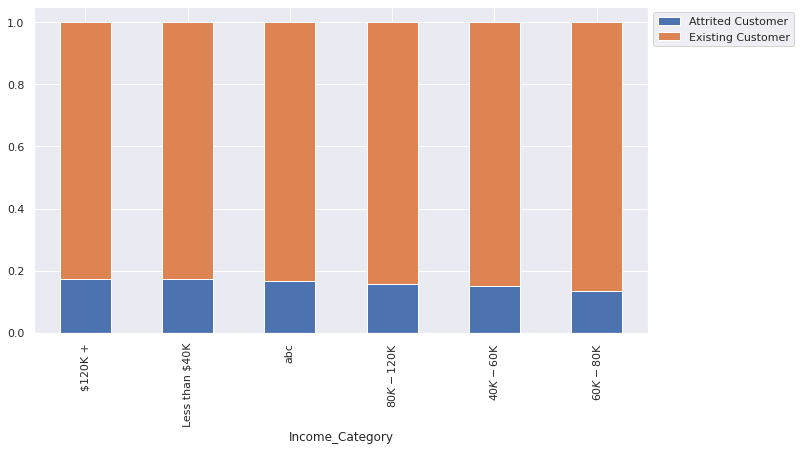

In [28]:
stacked_barplot(df_copy, "Income_Category", "Attrition_Flag")          

- Those earning the highest are among those with highest attrition, and this could be because they have more disposable income and thus do not eed the cards 
- Those earning less than 40k have high attrition and this could be due to their ability to keep up with the payment. 

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


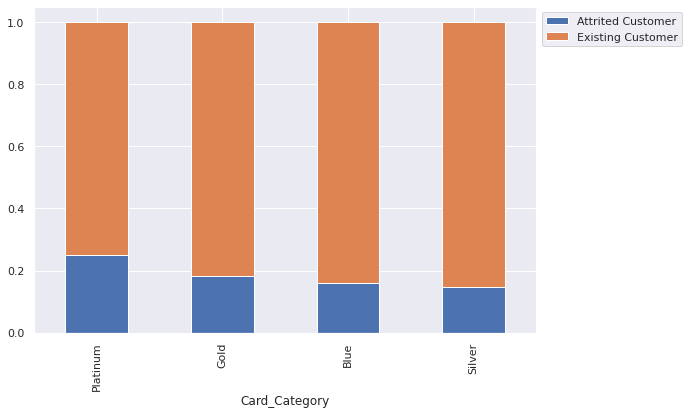

In [29]:
stacked_barplot(df_copy, "Card_Category", "Attrition_Flag")          

- Clients with Platinum cards, however much they belong to the minoritty have the highest attrition rate, followed by those with Gold. This could possible mean, these customers do not need credit facilities as they are more liquid.

# **Splitting dataset**

In [34]:
df_credit = df_copy.copy()

In [35]:
X = df_credit.drop(['Attrition_Flag'],axis=1)
y = df_credit['Attrition_Flag'].apply(lambda x : 1 if x=='Existing Customer' else 0)

In [36]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


# **Missing-Value Treatment**

We will use mode to impute missing values in Saving accounts and Checking account column.

In [37]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level", "Marital_Status"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [38]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

print(X_train.shape, X_test.shape, X_val.shape)

(6075, 30) (2026, 30) (2026, 30)


In [39]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))

Percentage of classes in training set:
1   0.839
0   0.161
Name: Attrition_Flag, dtype: float64
Percentage of classes in test set:
1   0.840
0   0.160
Name: Attrition_Flag, dtype: float64
Percentage of classes in validation set:
1   0.839
0   0.161
Name: Attrition_Flag, dtype: float64


- The datasets are distributed well

# **Model evaluation criterion**

### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer doesn't attrite
2. Predicting an customer will not attrite and the customer attrites

### Which case is more important? 
* Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset. 

### How to reduce this loss i.e need to reduce False Negatives?
* The bank wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide control attrition rate

**Before building the model, I will create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [40]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [41]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# **Building the Models**

# Model Building on Original data 

## Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [42]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [43]:
# Fitting the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [44]:
# Calculating the metrics
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf, '\n')

dtree_model_val_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Vaidation performance \n",dtree_model_val_perf, '\n')

dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf, '\n')


Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 

Vaidation performance 
    Accuracy  Recall  Precision    F1
0     0.932   0.961      0.958 0.959 

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.932   0.961      0.958 0.959 



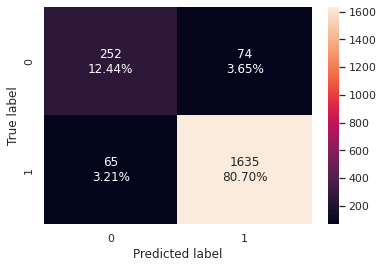

In [45]:
# creating the confusion matrix
confusion_matrix_sklearn(dtree, X_val, y_val)

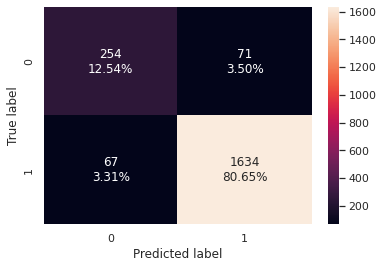

In [46]:
# creating the confusion matrix
confusion_matrix_sklearn(dtree, X_test, y_test)

* Decision tree is overfitting on the training data and is not able to generalize well on the validationa and test data across accuracy, recall and precision.

## Bagging Classifier

In [47]:
# fitting model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [48]:
# Calculating the differnt metrics
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf, '\n')

bagging_model_val_perf=model_performance_classification_sklearn(bagging, X_val, y_val)
print("Validation performance \n",bagging_model_val_perf, '\n')

bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf, '\n')

Training performance 
    Accuracy  Recall  Precision    F1
0     0.998   0.998      0.999 0.999 

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.952   0.978      0.965 0.972 

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.953   0.976      0.968 0.972 



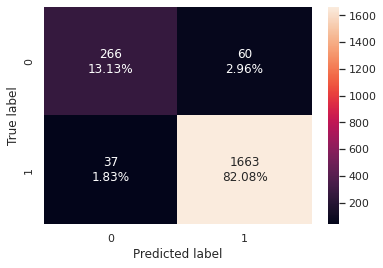

In [49]:
# creating the confusion matrix
confusion_matrix_sklearn(bagging, X_val, y_val)

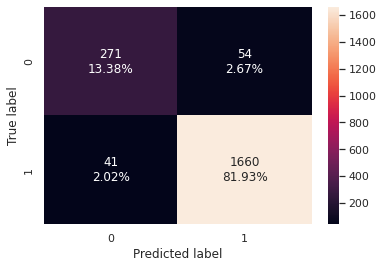

In [50]:
# creating the confusion matrix
confusion_matrix_sklearn(bagging, X_test, y_test)

* Bagging classifier is perfoming well on the training set and is performing well on the validation and test set across the recall, precision and accuracy as well as the F1 score.

## Random Forest

In [51]:
# fitting model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [52]:
# calculating metrics
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf, '\n')

rf_model_val_perf=model_performance_classification_sklearn(rf,X_val,y_val)
print("Validation performance \n",rf_model_val_perf, '\n')

rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf, '\n')


Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.945   0.985      0.952 0.968 

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.952   0.991      0.954 0.972 



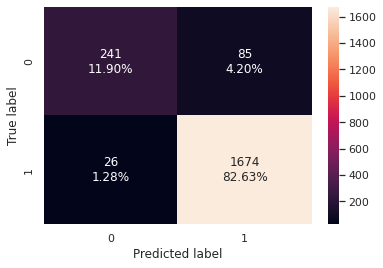

In [53]:
confusion_matrix_sklearn(rf,X_val,y_val)

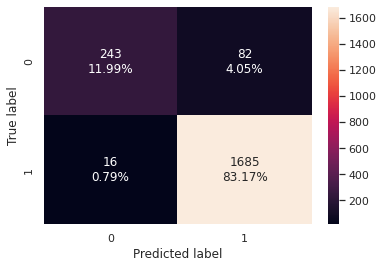

In [54]:
confusion_matrix_sklearn(rf,X_test,y_test)

* Random Forest is overfitting on training dataset and thus is not able to generalize well on the validation and test data across all the metrics

## Logistic Regression 

In [55]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

### Finding the coefficients

In [56]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Intercept
Coefficients,-0.018,-0.253,0.011,0.385,-0.517,-0.557,0.000,0.001,-0.000,0.193,-0.000,0.107,2.340,-0.175,0.396,-0.358,-0.198,-0.180,-0.195,-0.215,-0.112,-0.449,-0.032,0.036,-0.071,-0.246,-0.254,-0.162,-0.113,-0.101,-2.567


### Coefficient interpretations

* Coefficient of Customer age, Dependent count, Months_Inactive_12_mon, Contacts_Count_12_mon, Avg_Open_To_Buy,Total_Trans_Amt, Avg_Utilization_Ratio, Education_Level_Doctorate, Education_Level_Graduate, Education_Level_High School, Education_Level_Post-Graduate, Education_Level_Uneducated, Marital_Status_Married, Marital_Status_Single, Income_Category_$40K - $60K, Income_Category_$80K - $120K, Income_Category_Less than $40K, Card_Category_Gold, Platinum or Silver are negative, increase in these will lead to decrease in chances of a person having a customer attriting. 

* Coefficient all the levels of Income_Category_$60K - $80K, Male, Total_Ct_Chng_Q4_Q1, Total_Trans_Ct, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Months_on_book among others are positive,  increase in these will lead to increase in chances of a person having customers attriting.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [57]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Odds,0.983,0.776,1.011,1.469,0.596,0.573,1.000,1.001,1.000,1.213,1.000,1.113,10.384,0.839,1.485,0.699,0.820,0.835,0.823,0.806,0.894,0.638,0.968,1.037,0.932,0.782,0.776,0.850,0.893,0.904
Change_odd%,-1.749,-22.383,1.068,46.906,-40.369,-42.706,0.033,0.066,-0.033,21.282,-0.042,11.338,938.354,-16.062,48.518,-30.076,-17.992,-16.474,-17.733,-19.352,-10.582,-36.203,-3.181,3.701,-6.823,-21.793,-22.441,-14.989,-10.677,-9.641


### Coefficient interpretations

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a customer attriting by 0.98 times or a 0.12% decrease in odds of attriting.

* `Dependent count`: Holding all other features constant a 1 unit change in the dependents will decrease the odds of a customer attriting by 0.77 times or 33% decrease in the odds of attriting.  

* `Months_Inactive_12 month`: Holding all other features constant a 1 unit change in the Months_Inactive_12 month will decrease the odds of a customer attriting by 0.59 or decrease of 41% increase in odds of a customer attriting

* `customer count 12 mont`: Holding all other features constant a 1 unit change in the customer_count_12_months will decrease the odds of a customer attriting by 0.57 or decrease of 43% increase in odds of a customer attriting

* `Marital statust`: The odds of a person whose marital status is married attriting 0.89 less than the person who is divorced or 11% fewer odds of attriting. Similarly, The odds of a person whose marital status is single attriting is 0.63 times less than the person who is divorced or 27% fewer odds of attriting than the person divorced [keeping divorced category as a reference]

* `Education level`: 
 - The odds of a customer with a Doctorate attriting is 0.69 or 21% fewer odds of attriting than the person with college education, 
  - The odds of a customer with a High school attriting is 0.83 or 17% fewer odds of attriting than the person with college education, 
  - The odds of a customer with a Post Graduate attriting is 0.82 or 18% fewer odds of attriting than the person with college education, 
  - The odds of a customer with a Uneducated attriting is 0.80 or 20% fewer odds of attriting than the person with college education, 

#### Checking model performance on training set

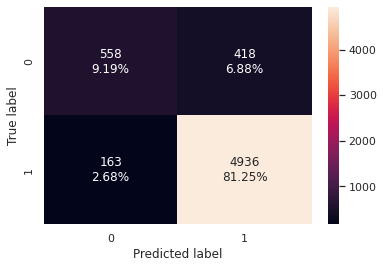

In [58]:
# creating confusion matrix
confusion_matrix_sklearn(lg, X_train, y_train)

In [59]:
log_reg_model_train_perf = model_performance_classification_sklearn(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.904,0.968,0.922,0.944


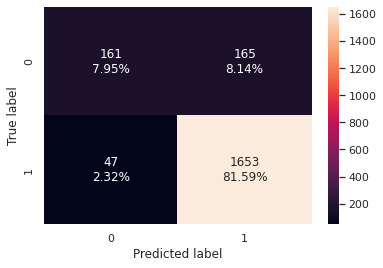

In [60]:
# creating confusion matrix
confusion_matrix_sklearn(lg, X_val, y_val)

In [61]:
log_reg_model_val_perf = model_performance_classification_sklearn(
    lg, X_val, y_val
)

print("Training performance:")
log_reg_model_val_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.895,0.972,0.909,0.940


#### Checking performance on test set

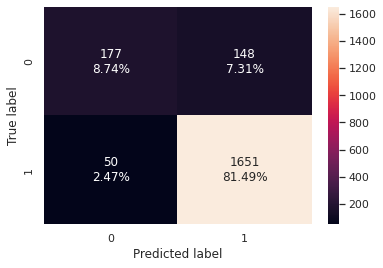

In [62]:
# creating confusion matrix
confusion_matrix_sklearn(lg, X_test, y_test)

In [63]:
log_reg_model_test_perf = model_performance_classification_sklearn(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.902,0.971,0.918,0.943


### Comparing logistic model perfomance Training vs Validation vs Testing datasets

In [64]:
print("Training performance: \n", log_reg_model_val_perf, ' \n')

print("Validation set performance: \n", log_reg_model_train_perf, ' \n' )

print("Test set performance: \n", log_reg_model_test_perf, ' \n' )

Training performance: 
    Accuracy  Recall  Precision    F1
0     0.895   0.972      0.909 0.940  

Validation set performance: 
    Accuracy  Recall  Precision    F1
0     0.904   0.968      0.922 0.944  

Test set performance: 
    Accuracy  Recall  Precision    F1
0     0.902   0.971      0.918 0.943  



- Logistic Regression is perfoming well across the training, validation and test datasets.

## AdaBoost Classifier

In [65]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [66]:
#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance \n", ab_classifier_model_train_perf, '\n')

ab_classifier_model_val_perf=model_performance_classification_sklearn(ab_classifier,X_val,y_val)
print("Validation performance \n", ab_classifier_model_val_perf, '\n')

ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance \n", ab_classifier_model_test_perf, '\n')

Training performance 
    Accuracy  Recall  Precision    F1
0     0.961   0.983      0.972 0.977 

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.955   0.982      0.965 0.973 

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.957   0.980      0.969 0.975 



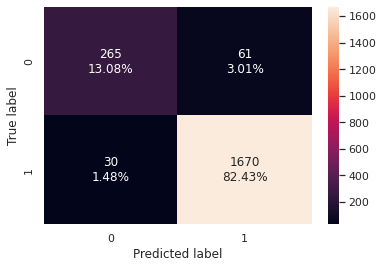

In [67]:
#Creating confusion matrix Validation
confusion_matrix_sklearn(ab_classifier,X_val,y_val)

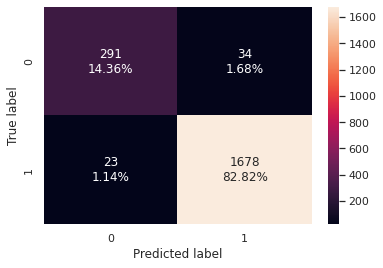

In [353]:
#Creating confusion matrix Testing
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance across the training, validation and test datasets.

## Gradient Boosting Classifier

In [68]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [69]:
#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf, '\n')

gb_classifier_model_val_perf=model_performance_classification_sklearn(gb_classifier,X_val,y_val)
print("Validation performance:\n",gb_classifier_model_val_perf, '\n')

gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf, '\n')

Training performance:
    Accuracy  Recall  Precision    F1
0     0.979   0.993      0.983 0.988 

Validation performance:
    Accuracy  Recall  Precision    F1
0     0.961   0.988      0.966 0.977 

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.967   0.992      0.969 0.981 



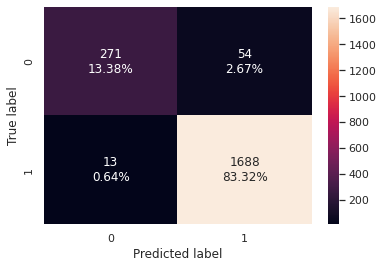

In [70]:
#Creating confusion matrix for validation
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

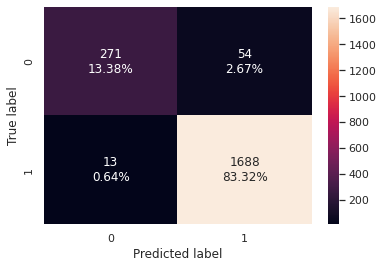

In [71]:
#Creating confusion matrix for testing
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* gradient is giving more generalized performance across the training, validation and test datasets.

# Model Building Oversampled data - using SMOTE

In [72]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

X_val_over, y_val_over = sm.fit_resample(X_val, y_val)

X_test_over, y_test_over = sm.fit_resample(X_test, y_test)

In [73]:
# oversampled training dataset
print("Train data Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Train data Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("Train data After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("Train data After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("Train data After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("Train data After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Train data Before OverSampling, count of label '1': 5099
Train data Before OverSampling, count of label '0': 976 

Train data After OverSampling, count of label '1': 5099
Train data After OverSampling, count of label '0': 2039 

Train data After OverSampling, the shape of train_X: (7138, 30)
Train data After OverSampling, the shape of train_y: (7138,) 



In [74]:
# oversampled validation dataset
print("Validation dataset Before OverSampling, count of label '1': {}".format(sum(y_val == 1)))
print("Validation dataset Before OverSampling, count of label '0': {} \n".format(sum(y_val == 0)))

print("Validation dataset After OverSampling, count of label '1': {}".format(sum(y_val_over == 1)))
print("Validation dataset After OverSampling, count of label '0': {} \n".format(sum(y_val_over == 0)))

print("Validation dataset After OverSampling, the shape of train_X: {}".format(X_val_over.shape))
print("Validation dataset After OverSampling, the shape of train_y: {} \n".format(y_val_over.shape))

Validation dataset Before OverSampling, count of label '1': 1700
Validation dataset Before OverSampling, count of label '0': 326 

Validation dataset After OverSampling, count of label '1': 1700
Validation dataset After OverSampling, count of label '0': 680 

Validation dataset After OverSampling, the shape of train_X: (2380, 30)
Validation dataset After OverSampling, the shape of train_y: (2380,) 



In [75]:
# oversampled testing dataset
print("Testing dataset Before OverSampling, count of label '1': {}".format(sum(y_test == 1)))
print("Testing dataset Before OverSampling, count of label '0': {} \n".format(sum(y_test == 0)))

print("Testing dataset After OverSampling, count of label '1': {}".format(sum(y_test_over == 1)))
print("Testing dataset After OverSampling, count of label '0': {} \n".format(sum(y_test_over == 0)))

print("Testing dataset After OverSampling, the shape of train_X: {}".format(X_test_over.shape))
print("Testing dataset After OverSampling, the shape of train_y: {} \n".format(y_test_over.shape))

Testing dataset Before OverSampling, count of label '1': 1701
Testing dataset Before OverSampling, count of label '0': 325 

Testing dataset After OverSampling, count of label '1': 1701
Testing dataset After OverSampling, count of label '0': 680 

Testing dataset After OverSampling, the shape of train_X: (2381, 30)
Testing dataset After OverSampling, the shape of train_y: (2381,) 



## Decision Tree Model

In [76]:
# build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
# pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

dtree_over = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [77]:
# Fitting the model
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

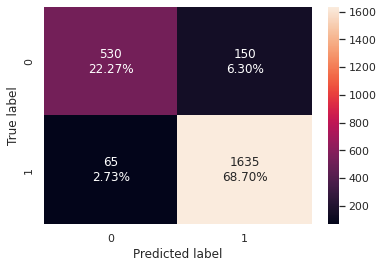

In [78]:
# creating the confusion matrix
confusion_matrix_sklearn(dtree_over, X_val_over, y_val_over)

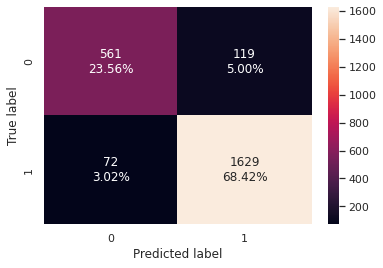

In [79]:
# creating the confusion matrix
confusion_matrix_sklearn(dtree_over, X_test_over, y_test_over)

In [80]:
# Calculating the differnt metrics
dtree_model_train_perf_over=model_performance_classification_sklearn(dtree_over, X_train_over, y_train_over)
print("Training performance \n",dtree_model_train_perf, '\n')

dtree_model_val_perf_over=model_performance_classification_sklearn(dtree_over, X_val_over, y_val_over)
print("Validation performance \n",dtree_model_val_perf_over, '\n')

dtree_model_test_perf_over=model_performance_classification_sklearn(dtree_over, X_test_over, y_test_over)
print("Testing performance \n",dtree_model_test_perf_over, '\n')


Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.910   0.962      0.916 0.938 

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.920   0.958      0.932 0.945 



* Decision tree is overfitting on the training data and is not able to generalize well on the validation and test data

## Bagging Classifier

In [81]:
# Fitting the model
bagging_over = BaggingClassifier(random_state=1)
bagging_over.fit(X_train_over,y_train_over)

BaggingClassifier(random_state=1)

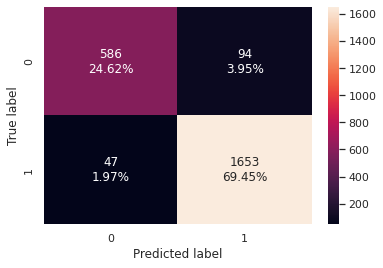

In [82]:
# creating the confusion matrix
confusion_matrix_sklearn(bagging_over, X_val_over, y_val_over)

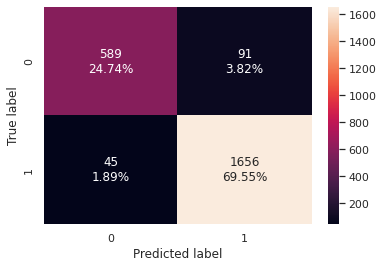

In [83]:
# creating the confusion matrix
confusion_matrix_sklearn(bagging_over, X_test_over, y_test_over)

In [84]:
# Calculating the differnt metrics
bagging_model_train_perf_over=model_performance_classification_sklearn(bagging_over, X_train_over, y_train_over)
print("Training performance \n",bagging_model_train_perf_over, '\n')

bagging_model_val_perf_over=model_performance_classification_sklearn(bagging_over, X_val_over, y_val_over)
print("Validation performance \n",bagging_model_val_perf_over, '\n')

bagging_model_test_perf_over=model_performance_classification_sklearn(bagging_over, X_test_over, y_test_over)
print("Testing performance \n",bagging_model_test_perf_over, '\n')

Training performance 
    Accuracy  Recall  Precision    F1
0     0.998   0.998      0.999 0.998 

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.941   0.972      0.946 0.959 

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.943   0.974      0.948 0.961 



* Bagging classifier is generalizing well though there is slight difference with validationa nd test data across all the metrices. 

## Random Forest

In [85]:
# Fitting the model
rf_over = RandomForestClassifier(random_state=1)
rf_over.fit(X_train_over,y_train_over)

RandomForestClassifier(random_state=1)

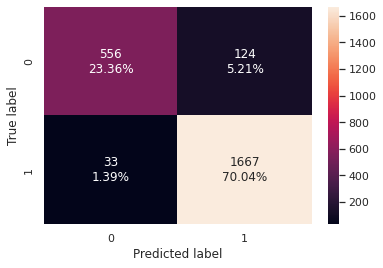

In [86]:
# creating the confusion matrix
confusion_matrix_sklearn(rf_over,X_val_over,y_val_over)

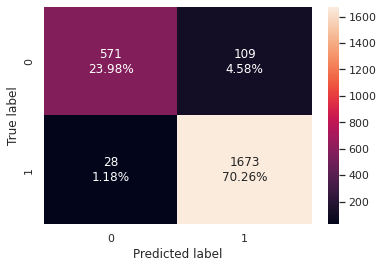

In [87]:
# creating the confusion matrix
confusion_matrix_sklearn(rf_over,X_test_over,y_test_over)

In [88]:
# Calculating the differnt metrics
rf_model_train_perf_over=model_performance_classification_sklearn(rf_over,X_train_over,y_train_over)
print("Training performance \n",rf_model_train_perf_over, '\n')

rf_model_val_perf_over=model_performance_classification_sklearn(rf_over,X_val_over,y_val_over)
print("Validation performance \n",rf_model_val_perf_over, '\n')

rf_model_test_perf_over=model_performance_classification_sklearn(rf_over,X_test_over,y_test_over)
print("Testing performance \n",rf_model_test_perf_over, '\n')

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.934   0.981      0.931 0.955 

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.942   0.984      0.939 0.961 



* Random Forest is overfitting in the training dataset and thus is not bale to generalize the validation and test datasets across all the metrices

## Logistic Regression 

In [89]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg_over = LogisticRegression(solver="newton-cg", random_state=1)
model = lg_over.fit(X_train_over, y_train_over)

### Finding the coefficients

In [90]:
# let us check the coefficients and intercept of the model

coef_df_over = pd.DataFrame(
    np.append(lg_over.coef_, lg_over.intercept_),
    index=X_train_over.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df_over.T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Intercept
Coefficients,-0.015,-0.165,0.014,0.420,-0.491,-0.499,-2.617,2.618,2.617,0.161,-0.000,0.112,2.489,-0.099,1.308,0.719,0.818,0.935,0.956,0.948,1.064,0.779,1.740,1.231,0.995,1.603,1.775,-0.043,-0.124,-0.034,-7.866


In [93]:
# let us check the coefficients and intercept of the model

coef_df_over = pd.DataFrame(
    np.append(lg_over.coef_, lg_over.intercept_),
    index=X_train_over.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df_over.T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Intercept
Coefficients,-0.015,-0.165,0.014,0.420,-0.491,-0.499,-2.617,2.618,2.617,0.161,-0.000,0.112,2.489,-0.099,1.308,0.719,0.818,0.935,0.956,0.948,1.064,0.779,1.740,1.231,0.995,1.603,1.775,-0.043,-0.124,-0.034,-7.866


### Coefficient interpretations

* Coefficient of Customer age, Dependent count, Months_Inactive_12_mon, Contacts_Count_12_mon, Avg_Open_To_Buy,Total_Trans_Amt, Avg_Utilization_Ratio, Education_Level_Doctorate, Education_Level_Graduate, Education_Level_High School, Education_Level_Post-Graduate, Education_Level_Uneducated, Marital_Status_Married, Marital_Status_Single, Income_Category_$40K - $60K, Income_Category_$80K - $120K, Income_Category_Less than $40K, Card_Category_Gold, Platinum or Silver are negative, increase in these will lead to decrease in chances of a person having a customer attriting. 

* Coefficient all the levels of Income_Category_$60K - $80K, Male, Total_Ct_Chng_Q4_Q1, Total_Trans_Ct, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Months_on_book among others are positive,  increase in these will lead to increase in chances of a person having customers attriting.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [94]:
# converting coefficients to odds
odds_over = np.exp(lg_over.coef_[0])

# finding the percentage change
perc_change_odds_over = (np.exp(lg_over.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds_over": odds_over, "Change_odd%": perc_change_odds_over}, index=X_train_over.columns).T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Odds_over,0.985,0.848,1.014,1.521,0.612,0.607,0.073,13.708,13.695,1.174,1.000,1.118,12.048,0.906,3.698,2.053,2.266,2.548,2.600,2.580,2.899,2.179,5.696,3.423,2.705,4.967,5.901,0.958,0.884,0.967
Change_odd%,-1.502,-15.182,1.430,52.128,-38.804,-39.274,-92.698,1270.792,1269.545,17.429,-0.045,11.843,1104.816,-9.422,269.832,105.257,126.580,154.813,160.010,157.985,189.932,117.930,469.552,242.306,170.488,396.693,490.088,-4.173,-11.648,-3.339


### Coefficient interpretations

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a customer attriting by 0.98 times or a 0.12% decrease in odds of attriting.

* `Dependent count`: Holding all other features constant a 1 unit change in the dependents will decrease the odds of a customer attriting by 0.84 times or 26% decrease in the odds of attriting.  

* `Months_Inactive_12 month`: Holding all other features constant a 1 unit change in the Months_Inactive_12 month will decrease the odds of a customer attriting by 0.61 or decrease of 39% increase in odds of a customer attriting

* `customer count 12 mont`: Holding all other features constant a 1 unit change in the customer_count_12_months will decrease the odds of a customer attriting by 0.60 or decrease of 40% increase in odds of a customer attriting

* `Avg_Utilization_Ratio`: Holding all other features constant a 1 unit change in the Avg_Utilization_Ratio will decrease the odds of a customer attriting by 0.90 or decrease of 10% increase in odds of a customer attriting

* `Card Category`: 
 - The odds of a customer with a Gold card attriting is 0.95 or 5% fewer odds of attriting than the person with blue card, 
  - The odds of a customer with a Platinum card attriting is 0.88 or 18% fewer odds of attriting than the person with a blue card, 
  - The odds of a customer with a Silver card attriting is 0.96 or 4% fewer odds of attriting than the person with a blue card, 


#### Checking model performance on training set

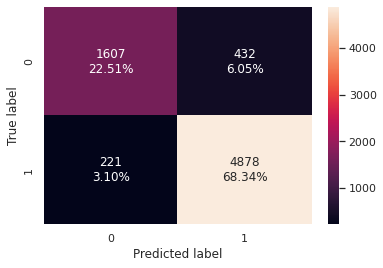

In [95]:
# creating confusion matrix
confusion_matrix_sklearn(lg_over, X_train_over, y_train_over)

In [96]:
log_reg_model_train_perf_over = model_performance_classification_sklearn(
    lg_over, X_train_over, y_train_over
)

print("Training performance:")
log_reg_model_train_perf_over

Training performance:


,Accuracy,Recall,Precision,F1
0,0.909,0.957,0.919,0.937


#### Checking performance on validation set

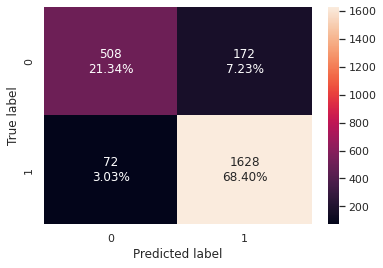

In [97]:
# creating confusion matrix
confusion_matrix_sklearn(lg_over, X_val_over, y_val_over)

In [98]:
log_reg_model_val_perf_over = model_performance_classification_sklearn(
    lg_over, X_val_over, y_val_over
)

print("Validation set performance:")
log_reg_model_val_perf_over

Validation set performance:


,Accuracy,Recall,Precision,F1
0,0.897,0.958,0.904,0.930


#### Checking performance on test set

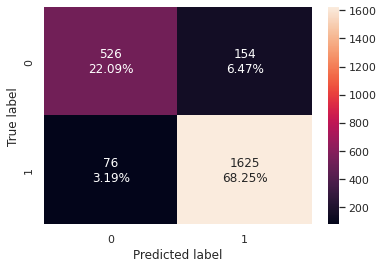

In [99]:
# creating confusion matrix
confusion_matrix_sklearn(lg_over, X_test_over, y_test_over)

In [100]:
log_reg_model_test_perf_over = model_performance_classification_sklearn(
    lg_over, X_test_over, y_test_over
)

print("Test set performance:")
log_reg_model_test_perf_over

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.903,0.955,0.913,0.934


### Comparing logistic model perfomance Training vs Validation vs Testing datasets

In [101]:
print("Training performance: \n", log_reg_model_train_perf_over, ' \n')

print("Validation set performance: \n", log_reg_model_val_perf_over, ' \n' )

print("Test set performance: \n", log_reg_model_test_perf_over, ' \n' )

Training performance: 
    Accuracy  Recall  Precision    F1
0     0.909   0.957      0.919 0.937  

Validation set performance: 
    Accuracy  Recall  Precision    F1
0     0.897   0.958      0.904 0.930  

Test set performance: 
    Accuracy  Recall  Precision    F1
0     0.903   0.955      0.913 0.934  



- The logistic model perfoms well in training dataset and generalizes well across the validationa nd test data across all the metrices

## AdaBoost Classifier

In [106]:
#Fitting the model
ab_classifier_over = AdaBoostClassifier(random_state=1)
ab_classifier_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(random_state=1)

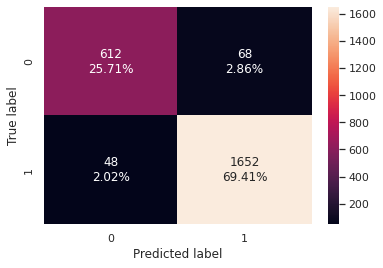

In [107]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_over,X_val_over,y_val_over)

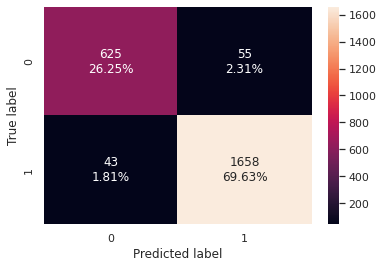

In [108]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_over,X_test_over,y_test_over)

In [109]:
#Calculating different metrics
ab_classifier_model_train_perf_over=model_performance_classification_sklearn(ab_classifier_over,X_train_over,y_train_over)
print("Testing performance \n", ab_classifier_model_train_perf_over, '\n')

ab_classifier_model_val_perf_over=model_performance_classification_sklearn(ab_classifier_over,X_val_over,y_val_over)
print("Validation performance \n", ab_classifier_model_val_perf_over, '\n')

ab_classifier_model_test_perf_over=model_performance_classification_sklearn(ab_classifier_over,X_test_over,y_test_over)
print("Training performance \n", ab_classifier_model_test_perf_over, '\n')

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.960   0.973      0.970 0.972 

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.951   0.972      0.960 0.966 

Training performance 
    Accuracy  Recall  Precision    F1
0     0.959   0.975      0.968 0.971 



* Adaboost is giving more generalized performance across all the datasets and metrices

## Gradient Boosting Classifier

In [110]:
#Fitting the model
gb_classifier_over = GradientBoostingClassifier(random_state=1)

gb_classifier_over.fit(X_train_over,y_train_over)


GradientBoostingClassifier(random_state=1)

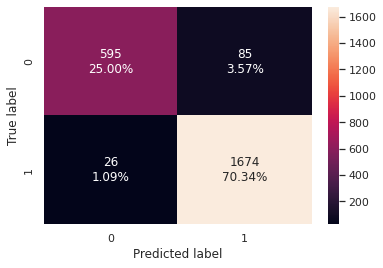

In [111]:
#Creating confusion matrix validation
confusion_matrix_sklearn(gb_classifier_over,X_val_over,y_val_over)

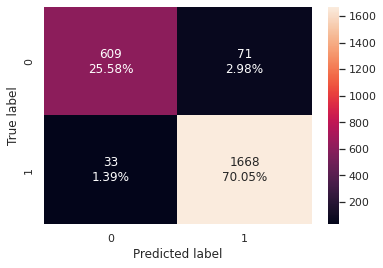

In [112]:
#Creating confusion matrix test
confusion_matrix_sklearn(gb_classifier_over,X_test_over,y_test_over)

In [113]:
#Calculating different metrics
gb_classifier_model_train_perf_over=model_performance_classification_sklearn(gb_classifier_over,X_train_over,y_train_over)
print("Training performance:\n",gb_classifier_model_train_perf_over, '\n')

gb_classifier_model_val_perf_over=model_performance_classification_sklearn(gb_classifier_over,X_val_over,y_val_over)
print("Validation performance:\n",gb_classifier_model_val_perf_over, '\n')

gb_classifier_model_test_perf_over=model_performance_classification_sklearn(gb_classifier_over,X_test_over,y_test_over)
print("Testing performance:\n",gb_classifier_model_test_perf_over, '\n')

Training performance:
    Accuracy  Recall  Precision    F1
0     0.976   0.987      0.980 0.983 

Validation performance:
    Accuracy  Recall  Precision    F1
0     0.953   0.985      0.952 0.968 

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.956   0.981      0.959 0.970 



* Gradient boosting is giving more generalized performance across all the datasets and metrices

# Model Building Undersampled data - using Random Undersampler

In [142]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
X_val_un, y_val_un = rus.fit_resample(X_val, y_val)
X_test_un, y_test_un = rus.fit_resample(X_test, y_test)

In [143]:
print("Training data Before Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("Training data Before Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("Training data After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("Training data After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("Training data After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("Training data After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Training data Before Under Sampling, count of label '1': 976
Training data Before Under Sampling, count of label '0': 976 

Training data After Under Sampling, count of label '1': 976
Training data After Under Sampling, count of label '0': 976 

Training data After Under Sampling, the shape of train_X: (1952, 30)
Training data After Under Sampling, the shape of train_y: (1952,) 



In [144]:
print("Validation data Before Under Sampling, count of label '1': {}".format(sum(y_val_un == 1)))
print("Validation data Before Under Sampling, count of label '0': {} \n".format(sum(y_val_un == 0)))

print("Validation data After Under Sampling, count of label '1': {}".format(sum(y_val_un == 1)))
print("Validation data After Under Sampling, count of label '0': {} \n".format(sum(y_val_un == 0)))

print("Validation data After Under Sampling, the shape of train_X: {}".format(X_val_un.shape))
print("Validation data After Under Sampling, the shape of train_y: {} \n".format(y_val_un.shape))

Validation data Before Under Sampling, count of label '1': 326
Validation data Before Under Sampling, count of label '0': 326 

Validation data After Under Sampling, count of label '1': 326
Validation data After Under Sampling, count of label '0': 326 

Validation data After Under Sampling, the shape of train_X: (652, 30)
Validation data After Under Sampling, the shape of train_y: (652,) 



In [145]:
print("Test data Before Under Sampling, count of label '1': {}".format(sum(y_test_un == 1)))
print("Test data Before Under Sampling, count of label '0': {} \n".format(sum(y_test_un == 0)))

print("Test data After Under Sampling, count of label '1': {}".format(sum(y_test_un == 1)))
print("Test data After Under Sampling, count of label '0': {} \n".format(sum(y_test_un == 0)))

print("Test data After Under Sampling, the shape of train_X: {}".format(X_test_un.shape))
print("Test data After Under Sampling, the shape of train_y: {} \n".format(y_test_un.shape))

Test data Before Under Sampling, count of label '1': 325
Test data Before Under Sampling, count of label '0': 325 

Test data After Under Sampling, count of label '1': 325
Test data After Under Sampling, count of label '0': 325 

Test data After Under Sampling, the shape of train_X: (650, 30)
Test data After Under Sampling, the shape of train_y: (650,) 



## Decision Tree Model

In [146]:
# pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.
dtree_un = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [147]:
# Fitting the model
dtree_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

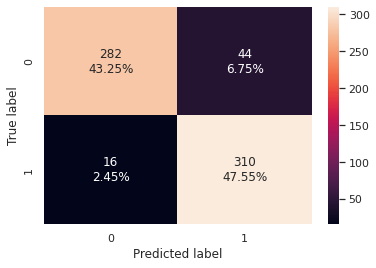

In [148]:
# creating the confusion matrix
confusion_matrix_sklearn(dtree_un, X_val_un, y_val_un)

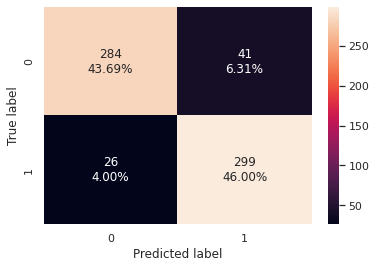

In [149]:
# Creating a confusion matrix
confusion_matrix_sklearn(dtree_un, X_test_un, y_test_un)

In [150]:
# Calculating differnt metrics
dtree_model_train_perf_un=model_performance_classification_sklearn(dtree_un, X_train_un, y_train_un)
print("Training performance \n",dtree_model_train_perf_un, '\n')

dtree_model_val_perf_un=model_performance_classification_sklearn(dtree_un, X_val_un, y_val_un)
print("Validation performance \n",dtree_model_val_perf_un, '\n')

dtree_model_test_perf_un=model_performance_classification_sklearn(dtree_un, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf_un, '\n')


Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000 

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.908   0.951      0.876 0.912 

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.909   0.915      0.974 0.944 



* Decision tree is overfitting on the training data and does not generalize well on the validation and test data across all metrices

## Bagging Classifier

In [151]:
# Fitting model
bagging_un = BaggingClassifier(random_state=1)
bagging_un.fit(X_train_un,y_train_un)

BaggingClassifier(random_state=1)

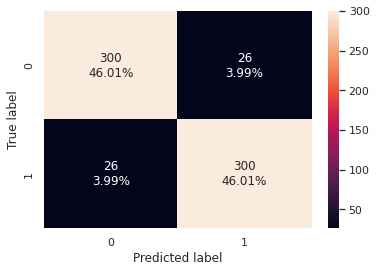

In [152]:
# creating the confusion matrix
confusion_matrix_sklearn(bagging_un, X_val_un, y_val_un)

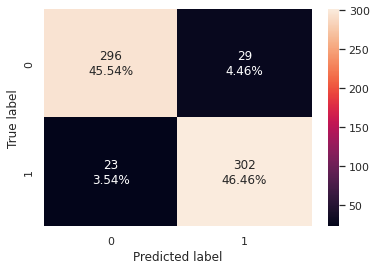

In [153]:
# # creating the confusion matrix
confusion_matrix_sklearn(bagging_un, X_test_un, y_test_un)

In [154]:
# Calculating metrics
bagging_model_train_perf_un=model_performance_classification_sklearn(bagging_un, X_train_un, y_train_un)
print("Training performance \n",bagging_model_train_perf_un)

bagging_model_val_perf_un=model_performance_classification_sklearn(bagging_un, X_val_un, y_val_un)
print("Validation performance \n",bagging_model_val_perf_un)

bagging_model_test_perf_un=model_performance_classification_sklearn(bagging_un, X_test_un, y_test_un)
print("Testing performance \n",bagging_model_test_perf_un)


Training performance 
    Accuracy  Recall  Precision    F1
0     0.997   0.994      1.000 0.997
Validation performance 
    Accuracy  Recall  Precision    F1
0     0.920   0.920      0.920 0.920
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.920   0.929      0.912 0.921


* Bagging classifier is perfoming well on the training set and slighly poorpy on validation and test datasest

## Random Forest

In [155]:
# Fitting the model
rf_un = RandomForestClassifier(random_state=1)
rf_un.fit(X_train_un,y_train_un)

RandomForestClassifier(random_state=1)

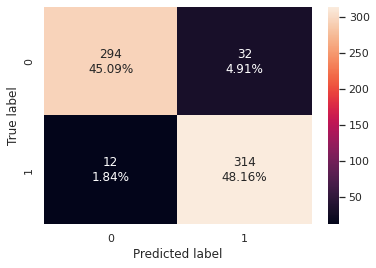

In [157]:
# creating the confusion matrix
confusion_matrix_sklearn(rf_un,X_val_un,y_val_un)

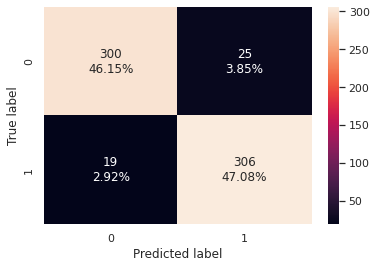

In [158]:
# creating the confusion matrix
confusion_matrix_sklearn(rf_un,X_test_un,y_test_un)

In [159]:
# calculating the different metrics
rf_model_train_perf_un=model_performance_classification_sklearn(rf_un,X_train_un,y_train_un)
print("Training performance \n",rf_model_train_perf_un)

rf_model_val_perf_un=model_performance_classification_sklearn(rf_un,X_val_un,y_val_un)
print("Validation performance \n",rf_model_val_perf_un)

rf_model_test_perf_un=model_performance_classification_sklearn(rf_un,X_test_un,y_test_un)
print("Testing performance \n",rf_model_test_perf_un)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Validation performance 
    Accuracy  Recall  Precision    F1
0     0.933   0.963      0.908 0.935
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.932   0.942      0.924 0.933


* Random Forest is overfitting on training dataset and does not generalize on validation and test datasets  across all the matrices

## Logistic Regression 

In [160]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data
# fitting the model
lg_un = LogisticRegression(solver="newton-cg", random_state=1)
model_train_un = lg_un.fit(X_train_un, y_train_un)

### Finding the coefficients

In [161]:
# let us check the coefficients and intercept of the model

coef_df_un = pd.DataFrame(
    np.append(lg_un.coef_, lg_un.intercept_),
    index=X_train_un.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df_un.T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Intercept
Coefficients,0.003,-0.185,0.014,0.336,-0.531,-0.510,0.000,0.001,-0.000,0.838,-0.000,0.119,2.407,0.284,0.796,0.023,0.046,0.094,-0.137,-0.128,0.229,-0.017,0.360,0.373,0.279,0.362,0.320,0.079,-0.375,-0.006,-7.430


### Coefficient interpretations

* Coefficient of Dependent count, Months_Inactive_12_mon, Contacts_Count_12_mon, Avg_Open_To_Buy,Total_Trans_Amt,Education_Level_Uneducated, Marital_Status_Single, Cards of Platinum or Silver are negative, increase in these will lead to decrease in chances of a person having a customer attriting. 

* Coefficient of the rest are positive,  increase in these will lead to increase in chances of a person having customers attriting.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [162]:
# converting coefficients to odds
odds_un = np.exp(lg_un.coef_[0])

# finding the percentage change
perc_change_odds_un = (np.exp(lg_un.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds_un": odds_un, "Change_odd%": perc_change_odds_un}, index=X_train_un.columns).T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Odds_un,1.003,0.831,1.014,1.399,0.588,0.601,1.000,1.001,1.000,2.311,1.000,1.127,11.095,1.329,2.216,1.023,1.047,1.099,0.872,0.880,1.258,0.983,1.433,1.452,1.322,1.436,1.377,1.083,0.687,0.994
Change_odd%,0.264,-16.861,1.448,39.876,-41.209,-39.923,0.027,0.054,-0.027,131.100,-0.047,12.664,1009.516,32.861,121.638,2.339,4.665,9.874,-12.813,-11.999,25.758,-1.724,43.264,45.180,32.208,43.619,37.694,8.256,-31.286,-0.551


### Coefficient interpretations

* `Dependent count`: Holding all other features constant a 1 unit change in the dependents will decrease the odds of a customer attriting by 0.83 times or 17% decrease in the odds of attriting.  

* `Months_Inactive_12 month`: Holding all other features constant a 1 unit change in the Months_Inactive_12 month will decrease the odds of a customer attriting by 0.58 or decrease of 42% increase in odds of a customer attriting

* `Contacts count 12 mont`: Holding all other features constant a 1 unit change in the contacts_count_12_months will decrease the odds of a customer attriting by 0.60 or decrease of 40% increase in odds of a customer attriting

* `Total transaction`: Holding all other features constant a 1 unit change in the contacts_count_12_months will decrease the odds of a customer attriting by 1.0 or decrease of 100% increase in odds of a customer attriting

* `Education level`: Holding all other features constant a 1 unit change in the among the uneducated will decrease the odds of a customer attriting by 0.88 or decrease of 22% increase in odds of a customer attriting

* `Marital status`: Holding all other features constant a 1 unit change in the among the single will decrease the odds of a customer attriting by 0.98 or decrease of 2% increase in odds of a customer attriting than those that are divorced

* `Card Category`: The odds of a customer with a Platinum card attriting is 0.68 or 22% fewer odds of attriting than the person with a blue card, 

#### Checking model performance on training set

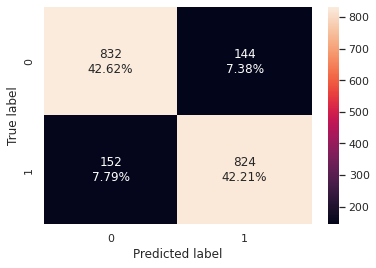

In [163]:
# creating confusion matrix
confusion_matrix_sklearn(lg_un, X_train_un, y_train_un)

In [164]:
log_reg_model_train_perf_un = model_performance_classification_sklearn(
    lg_un, X_train_un, y_train_un
)

print("Training performance:")
log_reg_model_train_perf_un

Training performance:


,Accuracy,Recall,Precision,F1
0,0.848,0.844,0.851,0.848


#### Checking model performance on validation set

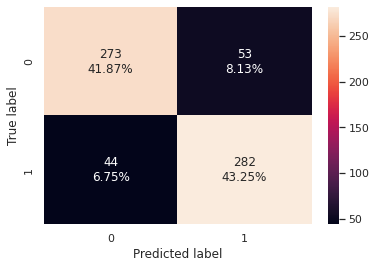

In [165]:
# creating confusion matrix
confusion_matrix_sklearn(lg_un, X_val_un, y_val_un)

In [166]:
log_reg_model_val_perf_un = model_performance_classification_sklearn(
    lg_un, X_val_un, y_val_un
)

print("Training performance:")
log_reg_model_val_perf_un

Training performance:


,Accuracy,Recall,Precision,F1
0,0.851,0.865,0.842,0.853


#### Checking performance on test set

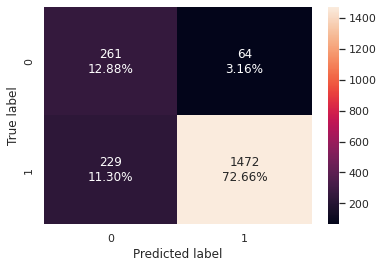

In [167]:
# creating confusion matrix
confusion_matrix_sklearn(lg_un, X_test, y_test)

In [168]:
log_reg_model_test_perf_un = model_performance_classification_sklearn(
    lg_un, X_test, y_test
)
print("Training performance:")
log_reg_model_test_perf_un

Training performance:


,Accuracy,Recall,Precision,F1
0,0.855,0.865,0.958,0.909


### Comparing the model perfomance on Train vs Validation vs Test datasets

In [169]:
print("Training performance:\n", log_reg_model_train_perf_un , '\n')

print("Validation performance:\n",log_reg_model_val_perf_un, '\n' )

print("Test set performance:\n", log_reg_model_test_perf_un , '\n')

Training performance:
    Accuracy  Recall  Precision    F1
0     0.848   0.844      0.851 0.848 

Validation performance:
    Accuracy  Recall  Precision    F1
0     0.851   0.865      0.842 0.853 

Test set performance:
    Accuracy  Recall  Precision    F1
0     0.855   0.865      0.958 0.909 



* Model is giving a generalized performance, though with lower proportions across the metrices

## AdaBoost Classifier

In [170]:
#Fitting the model
ab_classifier_un = AdaBoostClassifier(random_state=1)
ab_classifier_un.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

In [171]:
#Calculating different metrics
ab_classifier_model_train_perf_un=model_performance_classification_sklearn(ab_classifier_un,X_train_un,y_train_un)
print("Training performance \n",ab_classifier_model_train_perf_un, '\n')

ab_classifier_model_val_perf_un=model_performance_classification_sklearn(ab_classifier_un,X_val_un,y_val_un)
print("Validation performance \n",ab_classifier_model_val_perf_un, '\n')

ab_classifier_model_test_perf_un=model_performance_classification_sklearn(ab_classifier_un,X_test_un,y_test_un)
print("Testing performance \n",ab_classifier_model_test_perf_un, '\n')

Training performance 
    Accuracy  Recall  Precision    F1
0     0.946   0.941      0.951 0.946 

Validation performance 
    Accuracy  Recall  Precision    F1
0     0.940   0.951      0.931 0.941 

Testing performance 
    Accuracy  Recall  Precision    F1
0     0.949   0.935      0.962 0.949 



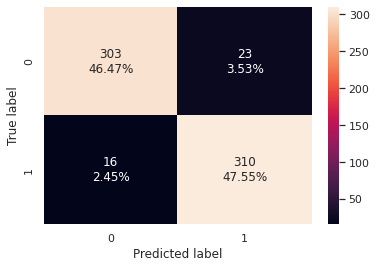

In [172]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_un,X_val_un,y_val_un)

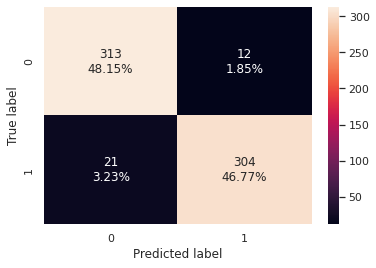

In [173]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_un,X_test_un,y_test_un)

* Adaboost is giving more generalized performance across all the datasets

## Gradient Boosting Classifier

In [174]:
#Fitting the model
gb_classifier_un = GradientBoostingClassifier(random_state=1)
gb_classifier_un.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=1)

In [175]:
#Calculating different metrics
gb_classifier_model_train_perf_un=model_performance_classification_sklearn(gb_classifier_un,X_train_un,y_train_un)
print("Training performance:\n",gb_classifier_model_train_perf_un, '\n')

gb_classifier_model_val_perf_un=model_performance_classification_sklearn(gb_classifier_un,X_val_un,y_val_un)
print("Validation performance:\n",gb_classifier_model_val_perf_un, '\n')

gb_classifier_model_test_perf_un=model_performance_classification_sklearn(gb_classifier_un,X_test_un,y_test_un)
print("Testing performance:\n",gb_classifier_model_test_perf_un, '\n')

Training performance:
    Accuracy  Recall  Precision    F1
0     0.975   0.972      0.978 0.975 

Validation performance:
    Accuracy  Recall  Precision    F1
0     0.946   0.963      0.932 0.947 

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.952   0.966      0.940 0.953 



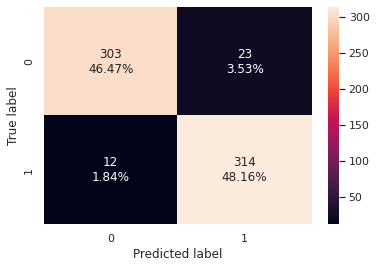

In [176]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_un,X_val_un,y_val_un)

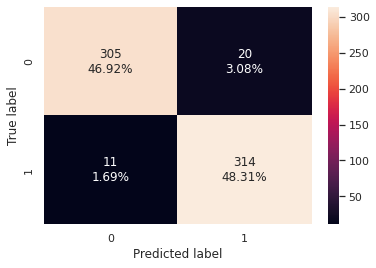

In [177]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_un,X_test_un,y_test_un)

* The gradient boosting classifier is giving a generalized model

# Hyperparameter tuning using random search

## Model Comparison

### Comparing all the models on original dataset

In [178]:
# training performance comparison

models_train_comp_df = pd.concat(
    [ dtree_model_train_perf.T, bagging_model_train_perf.T, rf_model_train_perf.T, log_reg_model_val_perf.T, ab_classifier_model_train_perf.T, gb_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Logistic Regression",
    "Ada Boost Classifier",
    "Gradient classifier",
    ]
print("Training performance comparison - Original dataset:")
models_train_comp_df

Training performance comparison - Original dataset:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Logistic Regression,Ada Boost Classifier,Gradient classifier
Accuracy,1.000,0.998,1.000,0.895,0.961,0.979
Recall,1.000,0.998,1.000,0.972,0.983,0.993
Precision,1.000,0.999,1.000,0.909,0.972,0.983
F1,1.000,0.999,1.000,0.940,0.977,0.988


In [179]:
# Validation performance comparison - oversampled

models_val_comp_df = pd.concat(
    [ dtree_model_val_perf.T, bagging_model_val_perf.T, rf_model_val_perf.T, log_reg_model_train_perf.T, ab_classifier_model_val_perf.T, gb_classifier_model_val_perf.T],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Logistic Regression",
    "Ada Boost Classifier",
    "Gradient classifier",
    ]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Logistic Regression,Ada Boost Classifier,Gradient classifier
Accuracy,0.932,0.952,0.945,0.904,0.955,0.961
Recall,0.961,0.978,0.985,0.968,0.982,0.988
Precision,0.958,0.965,0.952,0.922,0.965,0.966
F1,0.959,0.972,0.968,0.944,0.973,0.977


In [180]:
# Testing performance comparison - oversampled

models_test_comp_df = pd.concat(
    [ dtree_model_test_perf.T, bagging_model_test_perf.T, rf_model_test_perf.T, log_reg_model_test_perf.T, ab_classifier_model_test_perf.T, gb_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Logistic Regression",
    "Ada Boost Classifier",
    "Gradient classifier",
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Logistic Regression,Ada Boost Classifier,Gradient classifier
Accuracy,0.932,0.953,0.952,0.902,0.957,0.967
Recall,0.961,0.976,0.991,0.971,0.980,0.992
Precision,0.958,0.968,0.954,0.918,0.969,0.969
F1,0.959,0.972,0.972,0.943,0.975,0.981


* Decision tree is overfitting on training dataset  
* Bagging classifier performed better than Decision Tree. 
* Random Forest classifier overfitting on training dataset 
* Logistics Regression perfomingwell across the datasets 
* Adaboost classifier perfoming well across the datasets
* Gradient classifier perfomed well across all datasets

### Comparing all the models on oversampled dataset

In [181]:
# training performance comparison
models_train_comp_df_over = pd.concat(
    [ dtree_model_train_perf.T, bagging_model_train_perf_over.T, rf_model_train_perf_over.T, log_reg_model_train_perf_over.T, ab_classifier_model_train_perf_over.T, gb_classifier_model_train_perf_over.T],
    axis=1,
)
models_train_comp_df_over.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Logistic Regression",
    "Ada Boost Classifier",
    "Gradient classifier",
    ]
print("Training performance comparison - Oversampled dataset:")
models_train_comp_df_over

Training performance comparison - Oversampled dataset:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Logistic Regression,Ada Boost Classifier,Gradient classifier
Accuracy,1.000,0.998,1.000,0.909,0.960,0.976
Recall,1.000,0.998,1.000,0.957,0.973,0.987
Precision,1.000,0.999,1.000,0.919,0.970,0.980
F1,1.000,0.998,1.000,0.937,0.972,0.983


In [182]:
# Validation performance comparison - oversampled

models_val_comp_df_over = pd.concat(
    [ dtree_model_val_perf_over.T, bagging_model_val_perf_over.T, rf_model_val_perf_over.T, log_reg_model_val_perf_over.T, ab_classifier_model_val_perf_over.T, gb_classifier_model_val_perf_over.T],
    axis=1,
)
models_val_comp_df_over.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Logistic Regression",
    "Ada Boost Classifier",
    "Gradient classifier",
    ]
print("Validation performance comparison - Oversampled dataset:")
models_val_comp_df_over

Validation performance comparison - Oversampled dataset:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Logistic Regression,Ada Boost Classifier,Gradient classifier
Accuracy,0.910,0.941,0.934,0.897,0.951,0.953
Recall,0.962,0.972,0.981,0.958,0.972,0.985
Precision,0.916,0.946,0.931,0.904,0.960,0.952
F1,0.938,0.959,0.955,0.930,0.966,0.968


In [183]:
# Testing performance comparison - oversampled

models_test_comp_df_over = pd.concat(
    [ dtree_model_test_perf_over.T, bagging_model_test_perf_over.T, rf_model_test_perf_over.T, log_reg_model_test_perf_over.T, ab_classifier_model_test_perf_over.T, gb_classifier_model_test_perf_over.T],
    axis=1,
)
models_test_comp_df_over.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Logistic Regression",
    "Ada Boost Classifier",
    "Gradient classifier",
    ]
print("Testing performance comparison - Oversampled dataset:")
models_test_comp_df_over

Testing performance comparison - Oversampled dataset:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Logistic Regression,Ada Boost Classifier,Gradient classifier
Accuracy,0.920,0.943,0.942,0.903,0.959,0.956
Recall,0.958,0.974,0.984,0.955,0.975,0.981
Precision,0.932,0.948,0.939,0.913,0.968,0.959
F1,0.945,0.961,0.961,0.934,0.971,0.970


* Decision tree and Random forest are overfitting on training dataset  
* Bagging classifier performed better than Decision Tree. 
* Logistics Regression perfomingwell across the datasets 
* Adaboost classifier perfoming well across the datasets
* Gradient classifier perfomed well across all datasets

### Comparing all the models on undersampled dataset

In [184]:
# training performance comparison - undersampled dataset

models_train_comp_df_un = pd.concat(
    [ dtree_model_train_perf_un.T, bagging_model_train_perf_un.T, rf_model_train_perf_un.T, log_reg_model_train_perf_un.T, ab_classifier_model_train_perf_un.T, gb_classifier_model_train_perf_un.T],
    axis=1,
)
models_train_comp_df_un.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Logistic Regression",
    "Ada Boost Classifier",
    "Gradient classifier",
    ]
print("Training performance comparison - Undersampled dataset:")
models_train_comp_df_un

Training performance comparison - Undersampled dataset:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Logistic Regression,Ada Boost Classifier,Gradient classifier
Accuracy,1.000,0.997,1.000,0.848,0.946,0.975
Recall,1.000,0.994,1.000,0.844,0.941,0.972
Precision,1.000,1.000,1.000,0.851,0.951,0.978
F1,1.000,0.997,1.000,0.848,0.946,0.975


In [185]:
# Validation performance comparison - undersampled dataset

models_val_comp_df_un = pd.concat(
    [ dtree_model_val_perf_un.T, bagging_model_val_perf_un.T, rf_model_val_perf_un.T, log_reg_model_val_perf_un.T, ab_classifier_model_val_perf_un.T, gb_classifier_model_val_perf_un.T],
    axis=1,
)
models_val_comp_df_un.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Logistic Regression",
    "Ada Boost Classifier",
    "Gradient classifier",
    ]
print("Validation performance comparison:")
models_val_comp_df_un

Validation performance comparison:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Logistic Regression,Ada Boost Classifier,Gradient classifier
Accuracy,0.908,0.920,0.933,0.851,0.940,0.946
Recall,0.951,0.920,0.963,0.865,0.951,0.963
Precision,0.876,0.920,0.908,0.842,0.931,0.932
F1,0.912,0.920,0.935,0.853,0.941,0.947


In [186]:
# Testing performance comparison - undersampled dataset

models_test_comp_df_un = pd.concat(
    [ dtree_model_test_perf_un.T, bagging_model_test_perf_un.T, rf_model_test_perf_un.T, log_reg_model_test_perf_un.T, ab_classifier_model_test_perf_un.T, gb_classifier_model_test_perf_un.T],
    axis=1,
)
models_test_comp_df_un.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Logistic Regression",
    "Ada Boost Classifier",
    "Gradient classifier",
    ]
print("Testing performance comparison - Undersampled dataset:")
models_test_comp_df_un

Testing performance comparison - Undersampled dataset:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Logistic Regression,Ada Boost Classifier,Gradient classifier
Accuracy,0.909,0.920,0.932,0.855,0.949,0.952
Recall,0.915,0.929,0.942,0.865,0.935,0.966
Precision,0.974,0.912,0.924,0.958,0.962,0.940
F1,0.944,0.921,0.933,0.909,0.949,0.953


* Decision tree and Random forest are overfitting on training dataset  
* Bagging classifier performed better than Decision Tree and Random Forest. 
* Logistics Regression perfomingwell across the datasets though lower across the rest of the models 
* Adaboost classifier perfoming well across the datasets
* Gradient classifier perfomed well across all datasets

## Hyperparameter Tuning

### Tune Gradient Boosting on oversampled data using Randomized Search

In [225]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [226]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }

In [227]:
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.13398995181455464, max_depth=7,
                          n_estimators=326, subsample=0.5584998171904222)

 The best score across ALL searched params:
 0.7401199227165418

 The best parameters across ALL searched params:
 {'learning_rate': 0.13398995181455464, 'max_depth': 7, 'n_estimators': 326, 'subsample': 0.5584998171904222}


# **Model Production**

## Pipeline

In [228]:
# pipeline takes a list of tuples as parameter. The last entry is the call to the modeling algorithm
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', BaggingClassifier())
])

# "scaler" is the name assigned to StandardScaler
# "clf" is the name assigned to LogisticRegression

In [229]:
# Any element of the pipeline can be called later using the assigned name
pipeline['scaler'].fit(X_train_over)

StandardScaler()

In [230]:
# now the pipeline object can be used as a normal classifier
pipeline.fit(X_train_over,y_train_over)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', BaggingClassifier())])

In [231]:
# pipeline object's accuracy on the train set
pipeline.score(X_train_over, y_train_over)

0.9969179041748389

In [232]:
# pipeline object's accuracy on the test set
pipeline.score(X_test_over, y_test_over)

0.9407811843763125


## Make_pipeline

- make_pipeline is an extended version of the pipeline. Here, we don't need to assign names separately to each element of the pipeline.

In [233]:
# defining pipe using make_pipeline
pipe = make_pipeline(StandardScaler(), (BaggingClassifier())) 

In [217]:
# we can see that make_pipeline itself assigned names to all the objects
pipe.steps

[('standardscaler', StandardScaler()),
 ('baggingclassifier', BaggingClassifier())]

In [234]:
# now you can use the pipe object as a normal classifier
pipe.fit(X_train_over,y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier', BaggingClassifier())])

In [235]:
# pipe object's accuracy on the train set
pipe.score(X_train_over, y_train_over)

0.997198094704399

In [236]:
# pipe object's accuracy on the test set
pipe.score(X_test_over, y_test_over)

0.9399412011759765

# **Business Insights and Recommendations**


* We have been able to build a predictive model:
  a) that Bank can deploy this model to identify customers who are at the risk of attrition from using the credit card services.
  b) that Bank can use to find the reasons for attrition. 
  c) based on which the Bank can take appropriate actions to build better retention policies. 

* Factors that drive attrition - Age, Average Utilization, Dependants, and Card category.
* Age: Older customers attrite more, which is also logical as they may have invested and thus have money at their disposal or they may not qualify due to lack of employment 

* Dependants: Those customers with dependants seem to use the credit facilities more than those with less dependants, thus the need to target such clients 

* Card category: Customers with premium, gold and silver attrite more than those with blue. This could be that they have more income at their disposal and may not need to take credit. 

* Income: Those earning the highest are among those with highest attrition, and this could be because they have more disposable income and thus do not eed the cards. Those earning less than 40k have high attrition and this could be due to their ability to keep up with the payment. 

* Marital status: The single clients attrite more that the divorced, while the married are the least in attrition. this could be that the single do not have more needs for money as they may not have family members who are dependent on them. There is need to find a way of coaxing these group e.g rallying them towards investments

* Majoritty of the doctorate clients have attrited, and this could be because they are likely to be at a comfortable level where they do not need credit cards, followed by those on Post-Graduate. 

* Majority of the female customers are attriting compared to the male. This could be the nature of women not being risk takers compared to men. This group may need to be targeted with messaging and provision of opportunities to access and utilize credit facilities